Initial Imports 

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
#import functions

In [3]:
# autoreload
%load_ext autoreload
%autoreload 2

Import Data Set

In [4]:
# pulls csv file from data folder to find the shape of the dataset(ds)
salaries = pd.read_csv("../data/ds_salaries.csv")
salaries.shape

(3755, 11)

Examine Data

In [5]:
# uses pulled dataset(ds) salaries to examine top 5 enteries on ds
#   to see column names and the data
salaries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Correlate Data to Examine Significant Realationships

C:\Users\monke\AppData\Local\Temp\ipykernel_19760\816212374.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


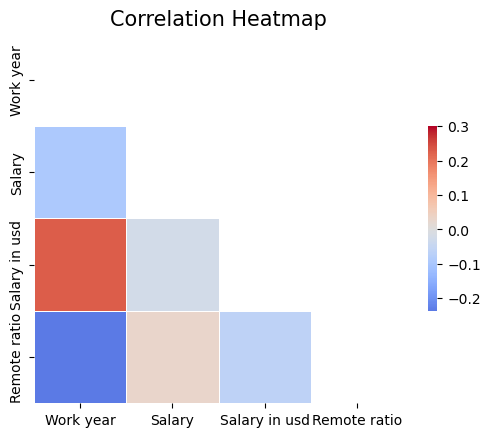

In [24]:
# Create a correlation heatmap to see if anything stands out
df = salaries.copy()

# Replace underscores with spaces in column names and capitalize the column names
df.columns = df.columns.str.replace('_', ' ').str.capitalize()

# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw a heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Title with fontsize 15
plt.title('Correlation Heatmap', fontsize = 15) 

plt.show()

Find the 20 Top Job Titles and Plot on Barh Graph

In [7]:
#Use dataset to examine 'job_title' column for top 20 jobs by count
top_job_titles = salaries['job_title'].value_counts().head(20).loc[::-1]
top_job_titles

Data Specialist                 14
Business Data Analyst           15
BI Data Analyst                 15
AI Scientist                    16
Computer Vision Engineer        18
Data Analytics Manager          22
Data Science Consultant         24
Machine Learning Scientist      26
Data Manager                    29
ML Engineer                     34
Research Engineer               37
Applied Scientist               58
Data Science Manager            58
Research Scientist              82
Data Architect                 101
Analytics Engineer             103
Machine Learning Engineer      289
Data Analyst                   612
Data Scientist                 840
Data Engineer                 1040
Name: job_title, dtype: int64

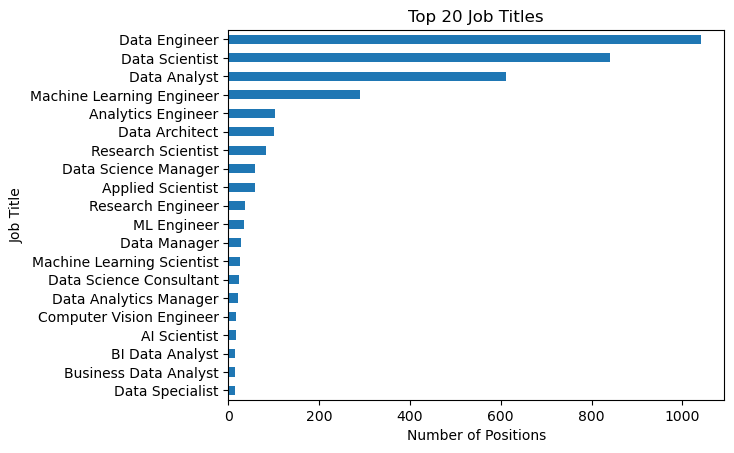

In [8]:
#Horizontal bar plot of top_job_titles in decending order
top_job_titles.plot.barh()
# Add labels and title
plt.xlabel('Number of Positions')
plt.ylabel('Job Title')
plt.title('Top 20 Job Titles')

# Show the plot
plt.show()

In [9]:
#Top salaries by count
top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(20).loc[::1]
top_salary_in_usd.sort_values()

185900    32
129300    32
250000    33
95000     33
75000     34
80000     36
90000     36
110000    45
170000    45
180000    47
175000    51
145000    54
135000    63
140000    63
200000    64
130000    82
160000    84
120000    91
150000    98
100000    99
Name: salary_in_usd, dtype: int64

Find Salary for the Top 20 Jobs and Plot on Barh Graph Using Median Salary

In [10]:
#The 20 top salaries in ascending order
top_salary_in_usd = salaries['salary_in_usd'].value_counts().head(20).loc[::-1]
top_salary_in_usd.shape

(20,)

In [11]:
# Group the data by job title and calculate the mean salary for each group
# Median will reduce the impact of abnormally large salaries
ave_salary_by_job = salaries.groupby('job_title')['salary'].median().head(20).loc[::-1]
ave_salary_by_job = ave_salary_by_job.sort_values()

print(ave_salary_by_job)

job_title
Autonomous Vehicle Technician          26277.5
3D Computer Vision Researcher          35000.0
AI Programmer                          55000.0
BI Data Engineer                       60000.0
BI Data Analyst                        67000.0
Applied Machine Learning Scientist     82500.0
Applied Data Scientist                 90000.0
Business Data Analyst                  95000.0
Applied Machine Learning Engineer      97500.0
Azure Data Engineer                   100000.0
Big Data Engineer                     100000.0
AI Developer                          108000.0
BI Analyst                            110000.0
AI Scientist                          122500.0
Big Data Architect                    124999.5
BI Developer                          130000.0
Analytics Engineer                    143860.0
Business Intelligence Engineer        171150.0
Applied Scientist                     191737.5
Cloud Data Architect                  250000.0
Name: salary, dtype: float64


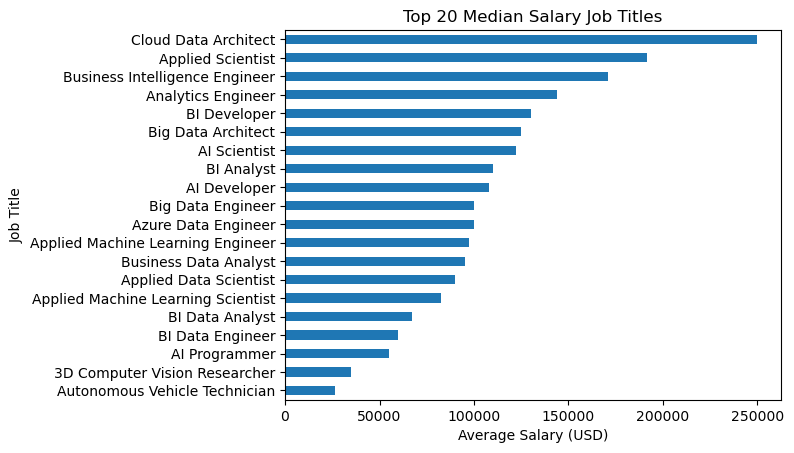

In [12]:
# top_salary_in_usd vs top_job_titles
ave_salary_by_job.plot.barh()

#Add Title and Labels to x axis and y axis
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 20 Median Salary Job Titles')

# Show the plot
plt.show()

Use Box Plot to Better Visualize Salary Range

Q1  77500.0
Q3  126249.625
IQR 48749.625


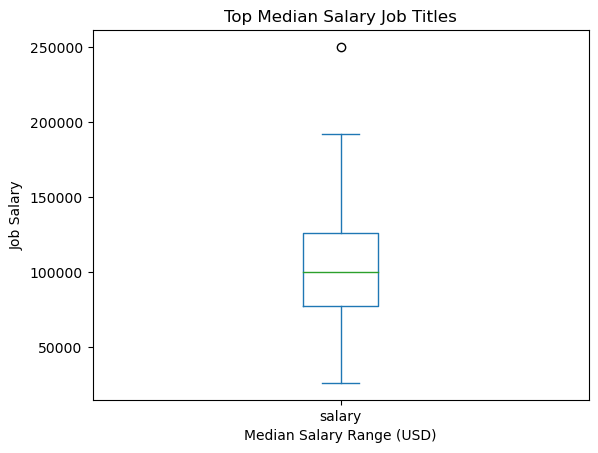

In [21]:
# Quick Box Plot to add perspective to prevoius data using median 
all_ave_salary = salaries.groupby('job_title')['salary'].median().head(28).loc[::-1]
all_ave_salary.plot.box()

# Calculate the interquartile range (IQR)
all_ave_salary = all_ave_salary.sort_values()
q1 = np.percentile(all_ave_salary, 25)
q3 = np.percentile(all_ave_salary, 75)
iqr = q3 - q1
# Prints Q1, Q3, and IQR to see the actual numbers
print('Q1 ',q1)
print('Q3 ', q3)
print("IQR", iqr)
#Add Title and Labels to x axis and y axis
plt.xlabel('Median Salary Range (USD)')
plt.ylabel('Job Salary')
plt.title("Top Median Salary Job Titles")
# Show the plot
plt.show()

Group Median Salaries by Experience Level for Top 20 Jobs

experience_level
EN     80000.0
MI    100000.0
SE    148000.0
EX    200000.0
Name: salary, dtype: float64


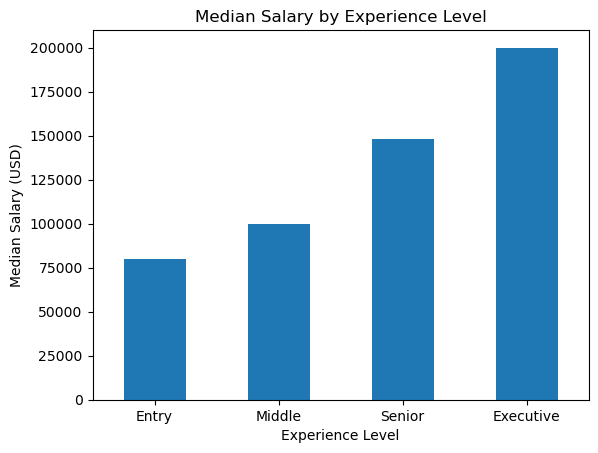

In [16]:
# group the data by experience_level and calculate the median salary for each group
ave_salary_by_job = salaries.groupby('experience_level')['salary'].median().head(20).loc[::-1]

# sort the data in ascending order
ave_salary_by_job = ave_salary_by_job.sort_values()

print(ave_salary_by_job)

# bar graph of salaries. 
ax = ave_salary_by_job.plot.bar()

# Add labels and title
ax.set_xlabel('Experience Level')
ax.set_ylabel('Median Salary (USD)')
ax.set_title('Median Salary by Experience Level')

# Set xticklabels with appropriate names
# Rotate the x-axis labels so they are horizontal instead of vertical
ax.set_xticklabels(ax.set_xticklabels(['Entry', 'Middle', 'Senior', 'Executive']), rotation=0)

# Show the plot
plt.show()
